In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils.perspective import four_point_transform

In [2]:
image=cv2.imread("sudoku1.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

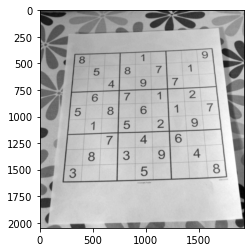

In [3]:
image_blurred=cv2.GaussianBlur(image,(7,7),3)
plt.imshow(image_blurred,cmap="gray")

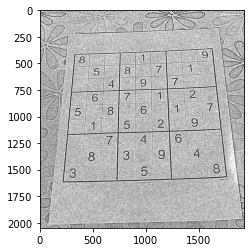

In [4]:
treash=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(treash,cmap="gray")

In [5]:
thresh=cv2.bitwise_not(treash)
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0]

In [6]:
contours = sorted(contours, key=cv2.contourArea, reverse= True)

In [7]:
sudoku_contour = None

for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    if len(approx) == 4:
        sudoku_contour = approx
        break
        
        
if sudoku_contour is None:
    1
    print("Sudoku not found!!")

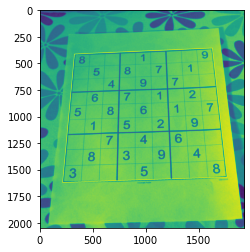

In [8]:
result = cv2.drawContours(image, [sudoku_contour], -1, (250, 250, 250), 5)
plt.imshow(result)

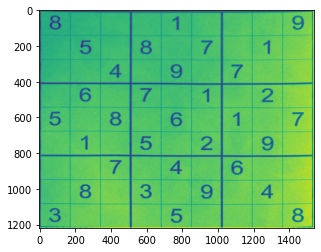

In [9]:
result = four_point_transform(image, approx.reshape(4, 2))
plt.imshow(result)